In [32]:
! pip install ydata-profiling dtale

Defaulting to user installation because normal site-packages is not writeable
  Using cached ydata_profiling-4.12.2-py2.py3-none-any.whl.metadata (20 kB)
  Using cached dtale-3.16.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached typeguard-4.4.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached dash_daq-0.5.0-py3-none-any.whl
  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached dash_bootstrap_components-1.7.1-py3-none-any.whl.metadata (17 kB)
  Using cached dash-2.18.2-py3-none-any.whl.metadata (10 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached Flask_Compress-1.17-py3-none-any.whl.metadata (8.8 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/insurance.csv')

data.sample(5)

,age,sex,bmi,children,smoker,region,charges
807,19,female,36.575,0,no,northwest,2136.88225
1118,33,male,35.750,1,yes,southeast,38282.74950
42,41,male,21.780,1,no,southeast,6272.47720
325,40,male,34.105,1,no,northeast,6600.20595
988,34,male,34.675,0,no,northeast,4518.82625


In [35]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [36]:
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes('object').columns

print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [37]:
data.shape

(1338, 7)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
from ydata_profiling import ProfileReport

# Assuming `data` is your dataframe
profile = ProfileReport(data, title="Insurance Data Profiling Report")

# Save the report as an HTML file
profile.to_file("insurance_data_profiling_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.16it/s]


age            Axes(0.125,0.53;0.227941x0.35)
bmi         Axes(0.398529,0.53;0.227941x0.35)
children    Axes(0.672059,0.53;0.227941x0.35)
charges        Axes(0.125,0.11;0.227941x0.35)
dtype: object

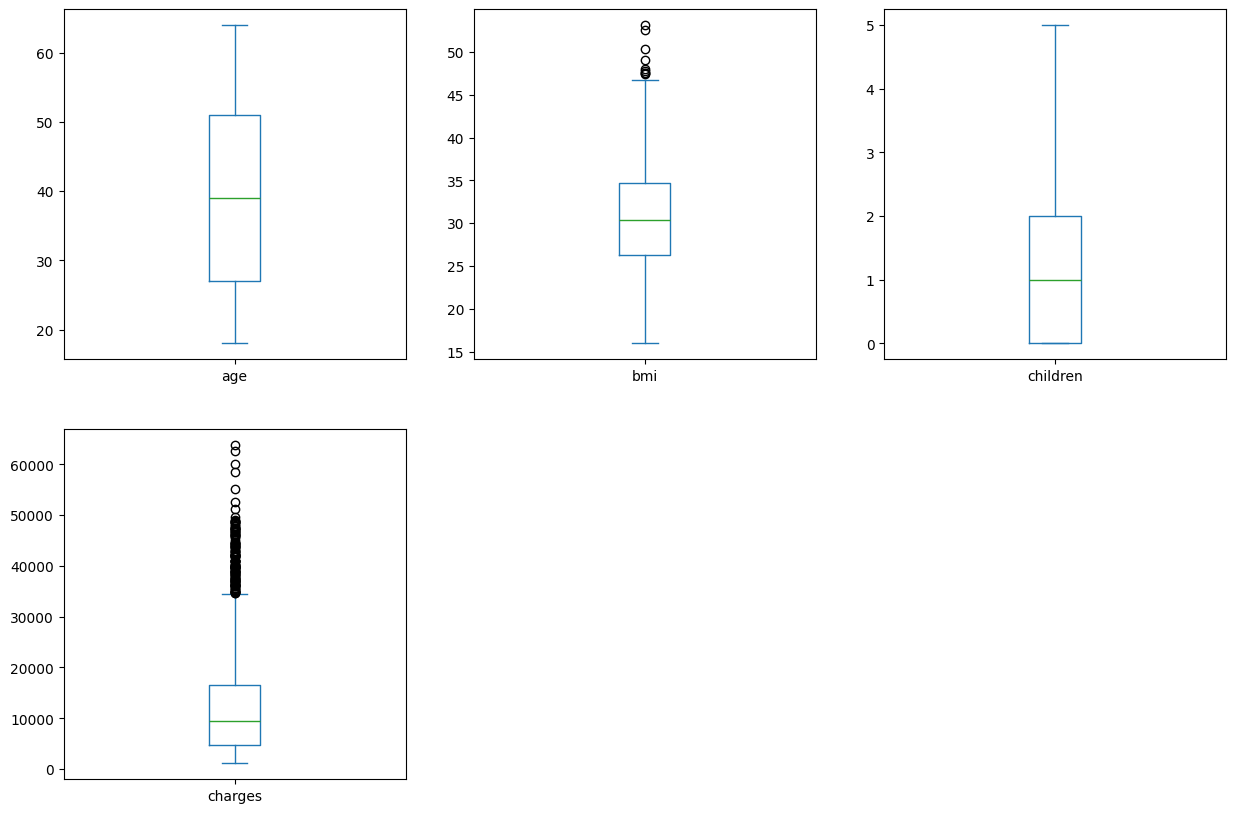

In [40]:
# check outliers
data[num_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(15,10))

In [41]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64